<a href="https://colab.research.google.com/github/Alexmet2007/DOE/blob/main/Time_Series1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install nbconvert
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Time_Series1.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Time_Series1.ipynb to html
[NbConvertApp] Writing 611017 bytes to /content/drive/MyDrive/Colab Notebooks/Time_Series1.html


**Series de Tiempo**

**Taller 1:** Producción de Cerveza Mensual

**Alex E. Salgado F**


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [23]:
from google.colab import drive
drive.mount('/content/drive')
# Importar el dataset
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/student_8_time_series.xlsx')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Value
0,2017-01-31,743.127573
1,2017-02-28,890.155387
2,2017-03-31,839.258412
3,2017-04-30,850.272802
4,2017-05-31,905.497453
5,2017-06-30,852.759404
6,2017-07-31,818.847756
7,2017-08-31,857.314380
8,2017-09-30,723.114073
9,2017-10-31,778.031972


In [24]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [25]:
data1 = data.copy()
# Rellenar los NA con la media del valor anterior y próximo
data1['Value'] = data1['Value'].fillna((data1['Value'].shift(-1) + data1['Value'].shift(1))/2)
data1

,Value
Date,
2017-01-31,743.127573
2017-02-28,890.155387
2017-03-31,839.258412
2017-04-30,850.272802
2017-05-31,905.497453
2017-06-30,852.759404
2017-07-31,818.847756
2017-08-31,857.314380
2017-09-30,723.114073


In [26]:
data2 = data.copy()
# Interpolación
data2['Value'] = data2['Value'].interpolate()
data2

,Value
Date,
2017-01-31,743.127573
2017-02-28,890.155387
2017-03-31,839.258412
2017-04-30,850.272802
2017-05-31,905.497453
2017-06-30,852.759404
2017-07-31,818.847756
2017-08-31,857.314380
2017-09-30,723.114073


In [27]:
# Función para evaluar estacionariedad con la prueba ADF (Dickey-Fuller)
def adf_test(series, title=''):
    """
    Realiza la prueba Dickey-Fuller Aumentada (ADF) y devuelve los resultados.
    """
    print(f'Resultados de la prueba Dickey-Fuller para {title}:')
    result = adfuller(series.dropna())
    labels = ['Estadístico ADF', 'p-valor', '# de retardos utilizados', '# de observaciones']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    if result[1] > 0.05:
        print("La serie es No Estacionaria")
    else:
        print("La serie es Estacionaria")
    print('\n')

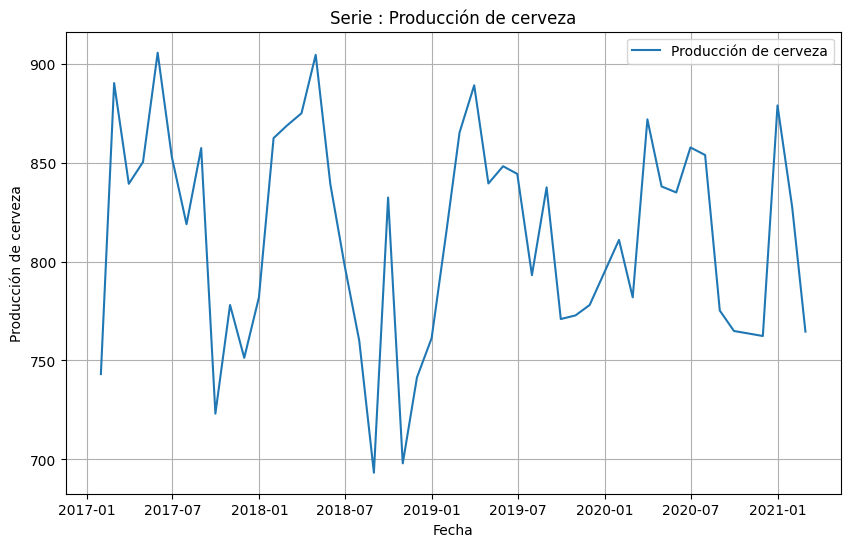

Resultados de la prueba Dickey-Fuller para Producción de cerveza:
Estadístico ADF: -5.019035012337251
p-valor: 2.034645290004475e-05
# de retardos utilizados: 6
# de observaciones: 43
La serie es Estacionaria




In [28]:
# Graficar la serie
plt.figure(figsize=(10, 6))
plt.plot(data1['Value'], label='Producción de cerveza')
plt.title('Serie : Producción de cerveza')
plt.xlabel('Fecha')
plt.ylabel('Producción de cerveza')
plt.legend()
plt.grid(True)
plt.show()

# Prueba de estacionariedad ADF
adf_test(data1['Value'], title="Producción de cerveza")

**Descomposición método aditivo**

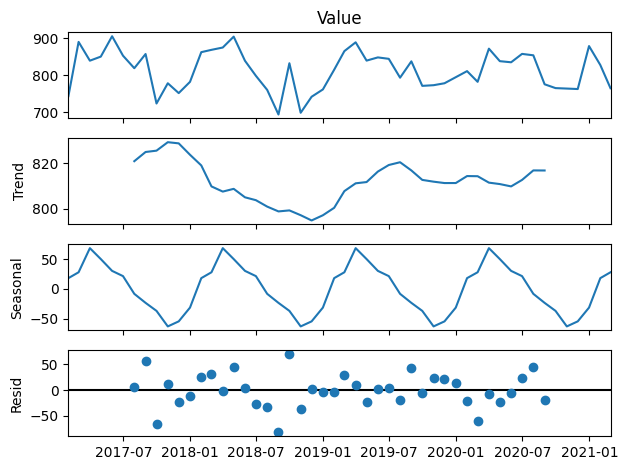

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie en sus componentes
descomposicion = seasonal_decompose(data1['Value'], model='additive')

# Graficar la descomposición
descomposicion.plot()
plt.show()

**Descomposición método multiplicativo**

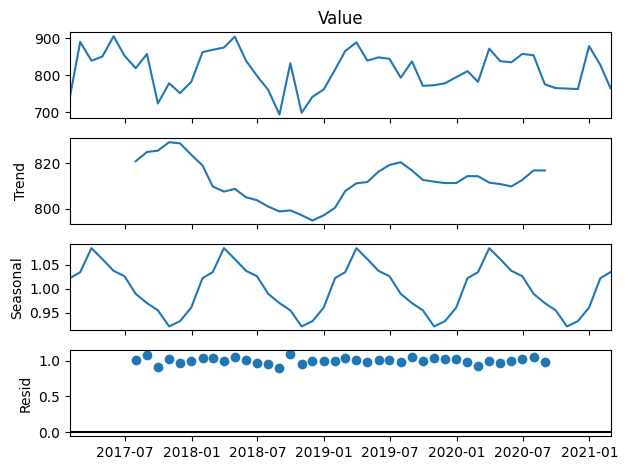

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie en sus componentes
descomposicion = seasonal_decompose(data1['Value'], model='multiplicative')

# Graficar la descomposición
descomposicion.plot()
plt.show()

**Análisis de las propiedades estádisticas de las series de tiempo**

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Media de la serie: 813.1803530874332
Varianza de la serie: 2825.847952777569


<Figure size 1000x600 with 0 Axes>

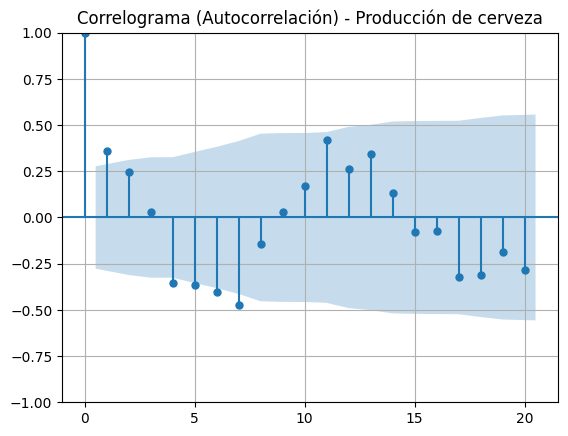

<Figure size 1000x600 with 0 Axes>

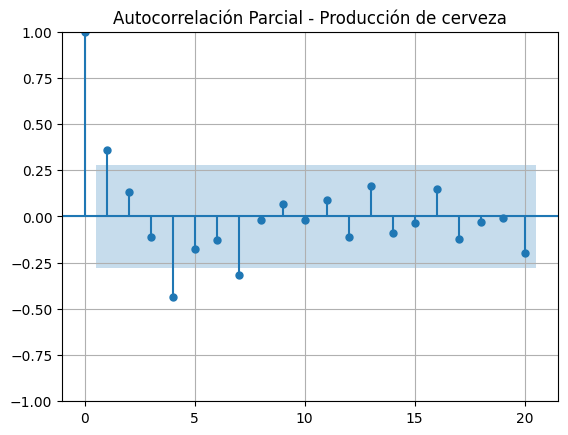

In [32]:
# 1. Calcular la media
mean_value = data1['Value'].mean()
print(f"Media de la serie: {mean_value}")

# 2. Calcular la varianza
variance_value = data1['Value'].var()
print(f"Varianza de la serie: {variance_value}")

# 3. Autocorrelación (Correlograma)
plt.figure(figsize=(10, 6))
plot_acf(data1['Value'], lags=20)
plt.title('Correlograma (Autocorrelación) - Producción de cerveza')
plt.grid(True)
plt.show()

# 4. Autocorrelación Parcial (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(data1['Value'], lags=20)
plt.title('Autocorrelación Parcial - Producción de cerveza')
plt.grid(True)
plt.show()

**Crear un modelo de autorregresion**

In [33]:
# Importamos las librerias necesarias
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

# Ajustar un modelo AR(1) usando ARIMA
AR_model = ARIMA(data1['Value'], order=(1, 0, 0))
AR_fit = AR_model.fit()
print(AR_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   50
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -265.466
Date:                Mon, 16 Sep 2024   AIC                            536.933
Time:                        18:19:21   BIC                            542.669
Sample:                    01-31-2017   HQIC                           539.117
                         - 02-28-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        811.7940     11.115     73.033      0.000     790.008     833.580
ar.L1          0.3743      0.156      2.403      0.016       0.069       0.680
sigma2      2386.9106    537.330      4.442      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


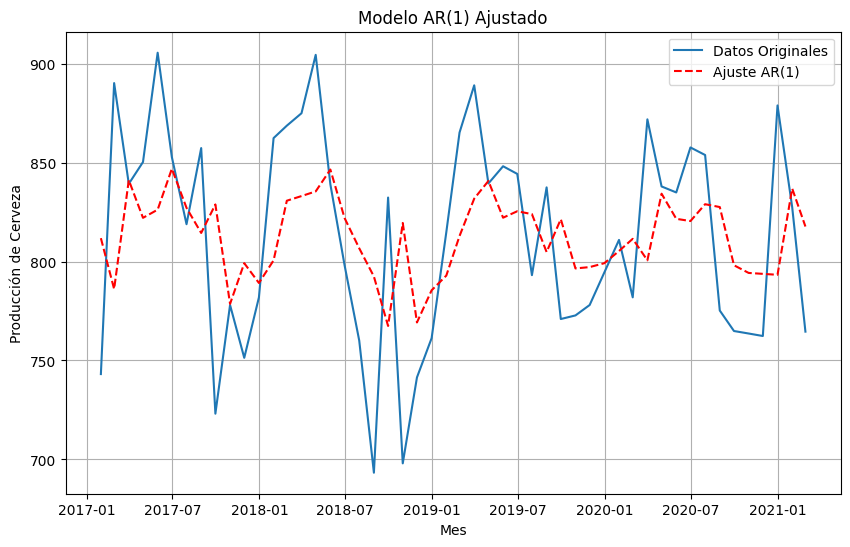

In [34]:
# Gráfico de los valores ajustados para AR(1)
plt.figure(figsize=(10, 6))
plt.plot(data1['Value'], label='Datos Originales')
plt.plot(AR_fit.fittedvalues, color='red', linestyle='--', label='Ajuste AR(1)')
plt.title('Modelo AR(1) Ajustado')
plt.xlabel('Mes')
plt.ylabel('Producción de Cerveza')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Predecir valores con el modelo AR(1)
AR_predictions = AR_fit.get_forecast(steps=10)
print("Primera predicción AR(1):", AR_predictions.predicted_mean[0])
print("Predicciones AR(1) a futuro:")
print(AR_predictions.summary_frame())

Primera predicción AR(1): 794.1183374999388
Predicciones AR(1) a futuro:
Value             mean    mean_se  mean_ci_lower  mean_ci_upper
2021-03-31  794.118337  48.856019     698.362300     889.874375
2021-04-30  805.178188  52.166089     702.934533     907.421844
2021-05-31  809.317785  52.613180     706.197847     912.437722
2021-06-30  810.867196  52.675511     707.625091     914.109301
2021-07-31  811.447126  52.684237     708.187918     914.706334
2021-08-31  811.664188  52.685460     708.402584     914.925792
2021-09-30  811.745432  52.685631     708.483493     915.007372
2021-10-31  811.775841  52.685655     708.513855     915.037828
2021-11-30  811.787223  52.685658     708.525230     915.049216
2021-12-31  811.791483  52.685659     708.529489     915.053477


<ipython-input-35-ed142a585048>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Primera predicción AR(1):", AR_predictions.predicted_mean[0])


In [36]:
# Ajustar un modelo MA(1) usando ARIMA
MA_model = ARIMA(data1['Value'], order=(0, 0, 1))
MA_fit = MA_model.fit()
print(MA_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   50
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -266.377
Date:                Mon, 16 Sep 2024   AIC                            538.755
Time:                        18:19:21   BIC                            544.491
Sample:                    01-31-2017   HQIC                           540.939
                         - 02-28-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        812.3600      9.416     86.279      0.000     793.906     830.814
ma.L1          0.3016      0.162      1.863      0.063      -0.016       0.619
sigma2      2478.2610    591.798      4.188      0.0

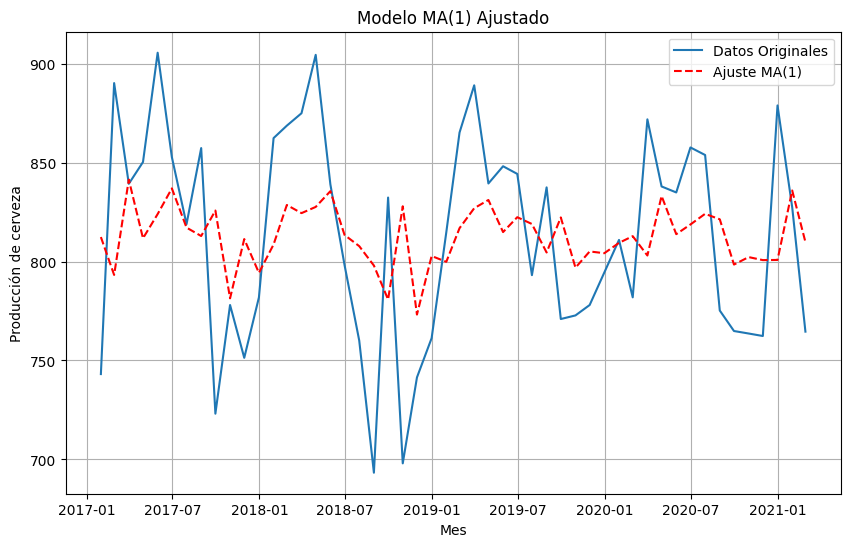

In [37]:
# Gráfico de los valores ajustados para MA(1)
plt.figure(figsize=(10, 6))
plt.plot(data1['Value'], label='Datos Originales')
plt.plot(MA_fit.fittedvalues, color='red', linestyle='--', label='Ajuste MA(1)')
plt.title('Modelo MA(1) Ajustado')
plt.xlabel('Mes')
plt.ylabel('Producción de cerveza')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Predecir valores con el modelo MA(1)
MA_predictions = MA_fit.get_forecast(steps=10)
print("Primera predicción MA(1):", MA_predictions.predicted_mean[0])
print("Predicciones MA(1) a futuro:")
print(MA_predictions.summary_frame())

Primera predicción MA(1): 798.7094621291742
Predicciones MA(1) a futuro:
Value             mean    mean_se  mean_ci_lower  mean_ci_upper
2021-03-31  798.709462  49.782135     701.138270     896.280654
2021-04-30  812.360009  51.996974     710.447812     914.272205
2021-05-31  812.360009  51.996974     710.447812     914.272205
2021-06-30  812.360009  51.996974     710.447812     914.272205
2021-07-31  812.360009  51.996974     710.447812     914.272205
2021-08-31  812.360009  51.996974     710.447812     914.272205
2021-09-30  812.360009  51.996974     710.447812     914.272205
2021-10-31  812.360009  51.996974     710.447812     914.272205
2021-11-30  812.360009  51.996974     710.447812     914.272205
2021-12-31  812.360009  51.996974     710.447812     914.272205


<ipython-input-38-e90a0c765928>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Primera predicción MA(1):", MA_predictions.predicted_mean[0])


In [39]:
# Comparar los modelos AR(1) y MA(1) a través de la correlación
AR_fitted = AR_fit.fittedvalues
MA_fitted = MA_fit.fittedvalues
correlation = np.corrcoef(AR_fitted, MA_fitted)[0, 1]
print("Correlación entre AR(1) y MA(1):", correlation)

Correlación entre AR(1) y MA(1): 0.9586855432961064


In [40]:
# Medidas de error: AIC y BIC para ambos modelos
print(f"AIC del modelo AR(1): {AR_fit.aic}")
print(f"AIC del modelo MA(1): {MA_fit.aic}")
print(f"BIC del modelo AR(1): {AR_fit.bic}")
print(f"BIC del modelo MA(1): {MA_fit.bic}")

AIC del modelo AR(1): 536.9328350715772
AIC del modelo MA(1): 538.7549549855169
BIC del modelo AR(1): 542.6689040878616
BIC del modelo MA(1): 544.4910240018013
